<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Unclip_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq diffusers
!pip install -qq transformers
!pip install -qq accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.2 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import DiffusionPipeline
from PIL import Image
from diffusers.utils import load_image, make_image_grid

device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")
dtype = torch.float16 if torch.cuda.is_available() else torch.bfloat16

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
davinci = load_image('https://i.imgur.com/seodN1o.png')
monalisa = load_image('https://i.imgur.com/gq6q4CJ.jpeg')
ravi = load_image('https://i.imgur.com/JhDBbfY.jpeg')
lamb = load_image('https://i.imgur.com/qJM0GoB.jpg')

In [4]:
pipe = DiffusionPipeline.from_pretrained(
    "kakaobrain/karlo-v1-alpha-image-variations",
    torch_dtype=dtype,
    custom_pipeline="unclip_image_interpolation"
)
pipe.to(device)


model_index.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


(…)/community/unclip_image_interpolation.py:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

decoder_scheduler/scheduler_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

decoder/config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

super_res_first/config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

super_res_last/config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

(…)uper_res_scheduler/scheduler_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

text_proj/config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.54G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/495M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

UnCLIPImageInterpolationPipeline {
  "_class_name": "UnCLIPImageInterpolationPipeline",
  "_diffusers_version": "0.26.1",
  "_name_or_path": "kakaobrain/karlo-v1-alpha-image-variations",
  "decoder": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "decoder_scheduler": [
    "diffusers",
    "UnCLIPScheduler"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "super_res_first": [
    "diffusers",
    "UNet2DModel"
  ],
  "super_res_last": [
    "diffusers",
    "UNet2DModel"
  ],
  "super_res_scheduler": [
    "diffusers",
    "UnCLIPScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_proj": [
    "unclip",
    "UnCLIPTextProjModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ]
}

In [10]:

images = [ravi, monalisa]

generator = torch.Generator(device=device).manual_seed(42)

output = pipe(image = images ,steps = 5, generator = generator)



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

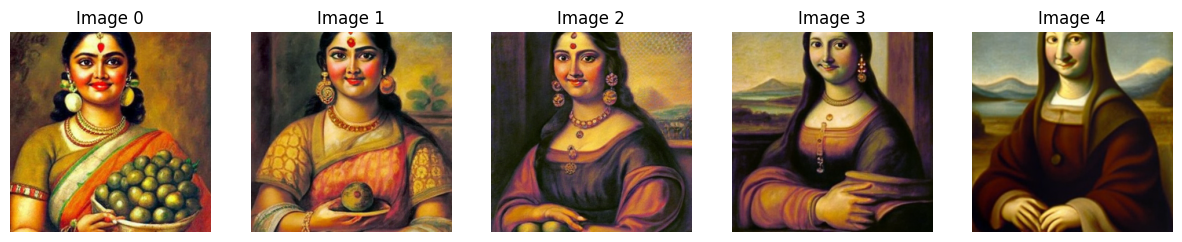

In [11]:
import matplotlib.pyplot as plt

# Assuming 'output.images' is a list of image objects
n_images = len(output.images)
fig, axs = plt.subplots(1, n_images, figsize=(15, 5)) # Adjust the subplot layout as needed

for i, image in enumerate(output.images):
    axs[i].imshow(image)
    axs[i].axis('off')  # to hide the axis
    axs[i].set_title(f'Image {i}')

plt.show()


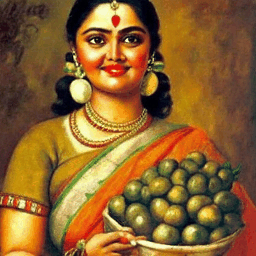

In [23]:
import imageio
import numpy as np
from PIL import Image

# Convert images to numpy arrays if they are PIL Images and store them in a list
images_as_arrays = []
for image in output.images:
    if isinstance(image, Image.Image):  # Check if the image is a PIL Image
        image = np.array(image)  # Convert PIL Image to numpy array
    images_as_arrays.append(image)

# Create a GIF directly from the numpy arrays
gif_path = 'animated.gif'
with imageio.get_writer(gif_path, mode='I', loop=10, duration=2.0) as writer:  # Adjust 'duration' as needed
    for image_array in images_as_arrays:
        writer.append_data(image_array)

# Display the GIF
from IPython.display import Image
display(Image(filename=gif_path))
